# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
#data_dir = './data/'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:12<00:00, 4.77KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

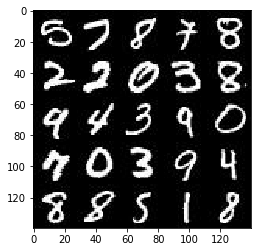

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

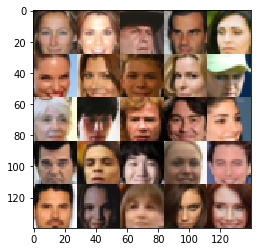

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input = tf.placeholder(tf.float32,shape=[None,
                                                 image_width,
                                                 image_height,
                                                 image_channels],
                                name = 'input_real')
    z_input = tf.placeholder(tf.float32,shape=[None,
                                             z_dim], 
                             name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, name="learn_rate")
    
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha=0.2
    stddev=0.02
    
    with tf.variable_scope('discriminator', reuse=reuse):
    
        # Input
        
        layer_1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
 
        # Layer 2
        layer_2 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        
        # Layer 3
        layer_3 = tf.layers.conv2d(images, 256, 5, strides=2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)

        # Flatten
        
        flatten = tf.reshape(layer_3, (-1, 7 * 7 * 256))
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Functi
    
    alpha = 0.2
    stddev = 0.02
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        # Layer 1 in 
        layer_1 = tf.layers.dense(z, 7 * 7 * 256)
        layer_1 = tf.reshape(layer_1, (-1, 7, 7, 256))
        layer_1 = tf.to_float(layer_1, name='layer_1')
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        #Layer 1 out
        
        # Layer 2
        layer_2 = tf.layers.conv2d_transpose(layer_1,
                                             128,
                                             5, 
                                             strides=1,
                                             padding='valid', 
                                             kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        layer_2 = tf.nn.dropout(layer_2, keep_prob=keep_prob)
        # Layer 2 out
        
        # Layer 3
        layer_3 = tf.layers.conv2d_transpose(layer_2,
                                             64,
                                             8,
                                             strides=2,
                                             padding='valid', 
                                             kernel_initializer=tf.random_normal_initializer (stddev=stddev))
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        layer_3 = tf.nn.dropout(layer_3, keep_prob=keep_prob)

        # Layer 3 out
        
        logits = tf.layers.conv2d_transpose(layer_3, 
                                            out_channel_dim, 
                                            5,
                                            strides=1, 
                                            padding='same',
                                            kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output_image = tf.tanh(logits)
        
    return output_image


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    keep_prob = 1
    
    generator_model = generator(input_z, out_channel_dim)
    
    d_real_model, d_real_logits = discriminator(input_real)
    
    d_fake_model, d_fake_logits = discriminator(generator_model,
                                            reuse=True)
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits,
                                                                    labels=tf.ones_like(d_real_model) * 0.9))
    
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,
                                                                    labels=tf.zeros_like(d_fake_model)))
    
    discriminator_loss = d_real_loss + d_fake_loss
    
    generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,
                                                                    labels=tf.ones_like(d_fake_model)))
    
    
    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Set variables
    training_vars = tf.trainable_variables()
    discriminator_vars = [var for var in training_vars if var.name.startswith ('discriminator')]
    generator_vars = [var for var in training_vars if var.name.startswith ('generator')]
    
    # Optimise
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator_vars)
        generator_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=generator_vars)
    
    return discriminator_train_ops, generator_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width,
                                                         image_height, 
                                                         image_channels, 
                                                         z_dim)
    
    discriminator_loss, generator_loss = model_loss(input_real, input_z, image_channels)
    discriminator_ops, generator_ops = model_opt(discriminator_loss, generator_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(discriminator_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(generator_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    discriminator_loss_train = discriminator_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    generator_loss_train = generator_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.3f}...".format(discriminator_loss_train),
                         "Generator Loss: {:.3f}".format(generator_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.891... Generator Loss: 0.507
Epoch 1/2... Discriminator Loss: 1.610... Generator Loss: 0.687
Epoch 1/2... Discriminator Loss: 1.444... Generator Loss: 0.804
Epoch 1/2... Discriminator Loss: 1.228... Generator Loss: 0.963
Epoch 1/2... Discriminator Loss: 1.384... Generator Loss: 0.782
Epoch 1/2... Discriminator Loss: 1.257... Generator Loss: 1.002
Epoch 1/2... Discriminator Loss: 1.325... Generator Loss: 0.853
Epoch 1/2... Discriminator Loss: 1.322... Generator Loss: 0.845
Epoch 1/2... Discriminator Loss: 0.871... Generator Loss: 1.248
Epoch 1/2... Discriminator Loss: 1.201... Generator Loss: 1.048


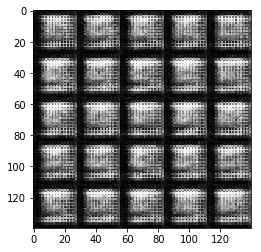

Epoch 1/2... Discriminator Loss: 1.256... Generator Loss: 0.982
Epoch 1/2... Discriminator Loss: 1.145... Generator Loss: 1.053
Epoch 1/2... Discriminator Loss: 1.071... Generator Loss: 1.119
Epoch 1/2... Discriminator Loss: 1.497... Generator Loss: 0.738
Epoch 1/2... Discriminator Loss: 1.027... Generator Loss: 1.241
Epoch 1/2... Discriminator Loss: 1.439... Generator Loss: 0.896
Epoch 1/2... Discriminator Loss: 1.252... Generator Loss: 0.965
Epoch 1/2... Discriminator Loss: 0.909... Generator Loss: 1.321
Epoch 1/2... Discriminator Loss: 1.282... Generator Loss: 0.989
Epoch 1/2... Discriminator Loss: 1.443... Generator Loss: 0.802


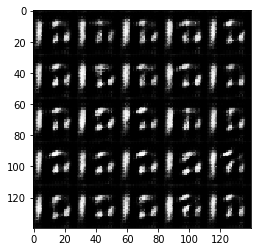

Epoch 1/2... Discriminator Loss: 1.605... Generator Loss: 0.704
Epoch 1/2... Discriminator Loss: 1.430... Generator Loss: 0.829
Epoch 1/2... Discriminator Loss: 1.574... Generator Loss: 0.825
Epoch 1/2... Discriminator Loss: 1.744... Generator Loss: 0.672
Epoch 1/2... Discriminator Loss: 1.249... Generator Loss: 0.968
Epoch 1/2... Discriminator Loss: 1.386... Generator Loss: 0.888
Epoch 1/2... Discriminator Loss: 1.307... Generator Loss: 0.889
Epoch 1/2... Discriminator Loss: 1.229... Generator Loss: 0.992
Epoch 1/2... Discriminator Loss: 1.335... Generator Loss: 0.932
Epoch 1/2... Discriminator Loss: 1.294... Generator Loss: 0.975


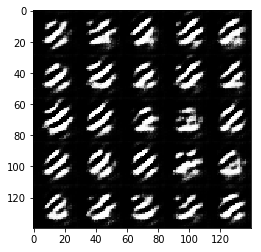

Epoch 1/2... Discriminator Loss: 1.338... Generator Loss: 0.891
Epoch 1/2... Discriminator Loss: 1.197... Generator Loss: 0.964
Epoch 1/2... Discriminator Loss: 1.270... Generator Loss: 0.903
Epoch 1/2... Discriminator Loss: 1.213... Generator Loss: 0.967
Epoch 1/2... Discriminator Loss: 1.376... Generator Loss: 0.842
Epoch 1/2... Discriminator Loss: 1.277... Generator Loss: 0.964
Epoch 1/2... Discriminator Loss: 1.344... Generator Loss: 0.929
Epoch 1/2... Discriminator Loss: 1.320... Generator Loss: 0.866
Epoch 1/2... Discriminator Loss: 1.295... Generator Loss: 0.934
Epoch 1/2... Discriminator Loss: 1.374... Generator Loss: 0.869


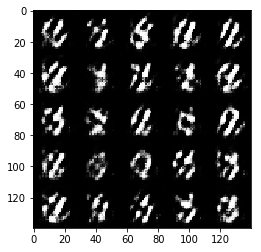

Epoch 1/2... Discriminator Loss: 1.426... Generator Loss: 0.782
Epoch 1/2... Discriminator Loss: 1.424... Generator Loss: 0.854
Epoch 1/2... Discriminator Loss: 1.402... Generator Loss: 0.881
Epoch 1/2... Discriminator Loss: 1.573... Generator Loss: 0.799
Epoch 1/2... Discriminator Loss: 1.495... Generator Loss: 0.806
Epoch 1/2... Discriminator Loss: 1.307... Generator Loss: 0.891
Epoch 1/2... Discriminator Loss: 1.457... Generator Loss: 0.788
Epoch 1/2... Discriminator Loss: 1.181... Generator Loss: 0.977
Epoch 1/2... Discriminator Loss: 1.257... Generator Loss: 0.934
Epoch 1/2... Discriminator Loss: 1.246... Generator Loss: 0.932


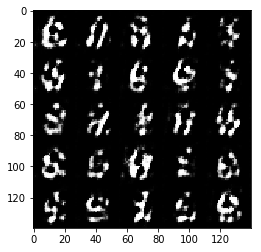

Epoch 1/2... Discriminator Loss: 1.266... Generator Loss: 0.960
Epoch 1/2... Discriminator Loss: 1.490... Generator Loss: 0.788
Epoch 1/2... Discriminator Loss: 1.373... Generator Loss: 0.835
Epoch 1/2... Discriminator Loss: 1.306... Generator Loss: 0.899
Epoch 1/2... Discriminator Loss: 1.428... Generator Loss: 0.792
Epoch 1/2... Discriminator Loss: 1.430... Generator Loss: 0.835
Epoch 1/2... Discriminator Loss: 1.341... Generator Loss: 0.856
Epoch 1/2... Discriminator Loss: 1.270... Generator Loss: 0.938
Epoch 1/2... Discriminator Loss: 1.352... Generator Loss: 0.823
Epoch 1/2... Discriminator Loss: 1.366... Generator Loss: 0.837


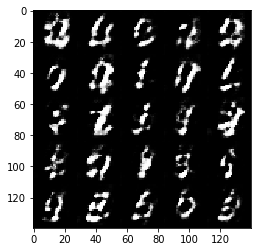

Epoch 1/2... Discriminator Loss: 1.346... Generator Loss: 0.855
Epoch 1/2... Discriminator Loss: 1.334... Generator Loss: 0.853
Epoch 1/2... Discriminator Loss: 1.370... Generator Loss: 0.814
Epoch 1/2... Discriminator Loss: 1.349... Generator Loss: 0.850
Epoch 1/2... Discriminator Loss: 1.356... Generator Loss: 0.866
Epoch 1/2... Discriminator Loss: 1.398... Generator Loss: 0.762
Epoch 1/2... Discriminator Loss: 1.320... Generator Loss: 0.839
Epoch 1/2... Discriminator Loss: 1.351... Generator Loss: 0.842
Epoch 1/2... Discriminator Loss: 1.370... Generator Loss: 0.859
Epoch 1/2... Discriminator Loss: 1.343... Generator Loss: 0.866


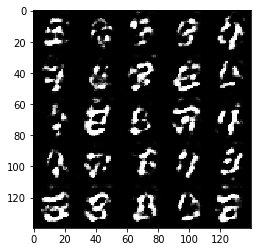

Epoch 1/2... Discriminator Loss: 1.348... Generator Loss: 0.841
Epoch 1/2... Discriminator Loss: 1.364... Generator Loss: 0.824
Epoch 1/2... Discriminator Loss: 1.363... Generator Loss: 0.815
Epoch 1/2... Discriminator Loss: 1.389... Generator Loss: 0.800
Epoch 1/2... Discriminator Loss: 1.344... Generator Loss: 0.840
Epoch 1/2... Discriminator Loss: 1.361... Generator Loss: 0.813
Epoch 1/2... Discriminator Loss: 1.343... Generator Loss: 0.775
Epoch 1/2... Discriminator Loss: 1.365... Generator Loss: 0.806
Epoch 1/2... Discriminator Loss: 1.366... Generator Loss: 0.839
Epoch 1/2... Discriminator Loss: 1.320... Generator Loss: 0.846


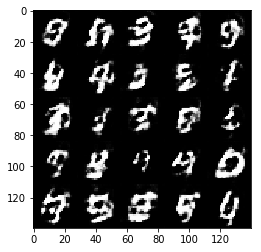

Epoch 1/2... Discriminator Loss: 1.364... Generator Loss: 0.828
Epoch 1/2... Discriminator Loss: 1.321... Generator Loss: 0.828
Epoch 1/2... Discriminator Loss: 1.335... Generator Loss: 0.809
Epoch 1/2... Discriminator Loss: 1.308... Generator Loss: 0.850
Epoch 1/2... Discriminator Loss: 1.276... Generator Loss: 0.826
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.827
Epoch 1/2... Discriminator Loss: 1.345... Generator Loss: 0.818
Epoch 1/2... Discriminator Loss: 1.315... Generator Loss: 0.875
Epoch 1/2... Discriminator Loss: 1.310... Generator Loss: 0.848
Epoch 1/2... Discriminator Loss: 1.324... Generator Loss: 0.803


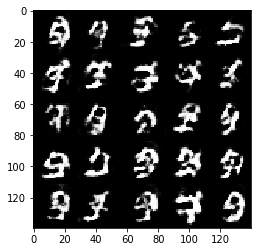

Epoch 1/2... Discriminator Loss: 1.334... Generator Loss: 0.852
Epoch 1/2... Discriminator Loss: 1.348... Generator Loss: 0.783
Epoch 1/2... Discriminator Loss: 1.322... Generator Loss: 0.845
Epoch 1/2... Discriminator Loss: 1.316... Generator Loss: 0.855
Epoch 1/2... Discriminator Loss: 1.365... Generator Loss: 0.802
Epoch 1/2... Discriminator Loss: 1.338... Generator Loss: 0.810
Epoch 1/2... Discriminator Loss: 1.327... Generator Loss: 0.859
Epoch 1/2... Discriminator Loss: 1.345... Generator Loss: 0.769
Epoch 1/2... Discriminator Loss: 1.332... Generator Loss: 0.854
Epoch 1/2... Discriminator Loss: 1.315... Generator Loss: 0.837


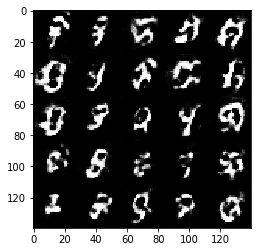

Epoch 1/2... Discriminator Loss: 1.342... Generator Loss: 0.870
Epoch 1/2... Discriminator Loss: 1.324... Generator Loss: 0.828
Epoch 1/2... Discriminator Loss: 1.318... Generator Loss: 0.869
Epoch 1/2... Discriminator Loss: 1.385... Generator Loss: 0.813
Epoch 1/2... Discriminator Loss: 1.349... Generator Loss: 0.815
Epoch 1/2... Discriminator Loss: 1.311... Generator Loss: 0.823
Epoch 1/2... Discriminator Loss: 1.335... Generator Loss: 0.809
Epoch 1/2... Discriminator Loss: 1.340... Generator Loss: 0.859
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.797
Epoch 1/2... Discriminator Loss: 1.313... Generator Loss: 0.844


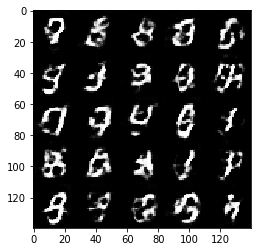

Epoch 1/2... Discriminator Loss: 1.298... Generator Loss: 0.844
Epoch 1/2... Discriminator Loss: 1.303... Generator Loss: 0.853
Epoch 1/2... Discriminator Loss: 1.331... Generator Loss: 0.837
Epoch 1/2... Discriminator Loss: 1.315... Generator Loss: 0.816
Epoch 1/2... Discriminator Loss: 1.320... Generator Loss: 0.855
Epoch 1/2... Discriminator Loss: 1.340... Generator Loss: 0.867
Epoch 1/2... Discriminator Loss: 1.342... Generator Loss: 0.818
Epoch 1/2... Discriminator Loss: 1.312... Generator Loss: 0.865
Epoch 1/2... Discriminator Loss: 1.337... Generator Loss: 0.810
Epoch 1/2... Discriminator Loss: 1.325... Generator Loss: 0.839


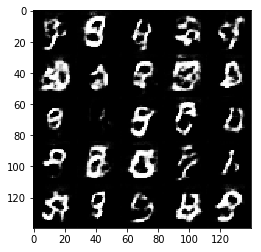

Epoch 1/2... Discriminator Loss: 1.344... Generator Loss: 0.766
Epoch 1/2... Discriminator Loss: 1.308... Generator Loss: 0.867
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.802
Epoch 1/2... Discriminator Loss: 1.323... Generator Loss: 0.829
Epoch 1/2... Discriminator Loss: 1.276... Generator Loss: 0.917
Epoch 1/2... Discriminator Loss: 1.313... Generator Loss: 0.833
Epoch 1/2... Discriminator Loss: 1.279... Generator Loss: 0.878
Epoch 1/2... Discriminator Loss: 1.310... Generator Loss: 0.826
Epoch 1/2... Discriminator Loss: 1.356... Generator Loss: 0.819
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.847


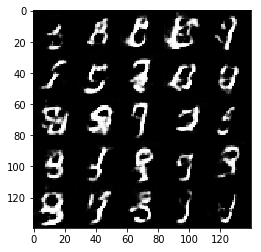

Epoch 1/2... Discriminator Loss: 1.302... Generator Loss: 0.873
Epoch 1/2... Discriminator Loss: 1.308... Generator Loss: 0.811
Epoch 1/2... Discriminator Loss: 1.318... Generator Loss: 0.835
Epoch 1/2... Discriminator Loss: 1.315... Generator Loss: 0.842
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.878
Epoch 1/2... Discriminator Loss: 1.336... Generator Loss: 0.816
Epoch 1/2... Discriminator Loss: 1.348... Generator Loss: 0.821
Epoch 1/2... Discriminator Loss: 1.373... Generator Loss: 0.787
Epoch 1/2... Discriminator Loss: 1.296... Generator Loss: 0.851
Epoch 1/2... Discriminator Loss: 1.349... Generator Loss: 0.763


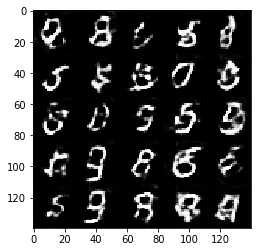

Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.904
Epoch 1/2... Discriminator Loss: 1.340... Generator Loss: 0.874
Epoch 1/2... Discriminator Loss: 1.335... Generator Loss: 0.820
Epoch 1/2... Discriminator Loss: 1.357... Generator Loss: 0.774
Epoch 1/2... Discriminator Loss: 1.325... Generator Loss: 0.868
Epoch 1/2... Discriminator Loss: 1.327... Generator Loss: 0.779
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.829
Epoch 1/2... Discriminator Loss: 1.298... Generator Loss: 0.812
Epoch 1/2... Discriminator Loss: 1.294... Generator Loss: 0.854
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.794


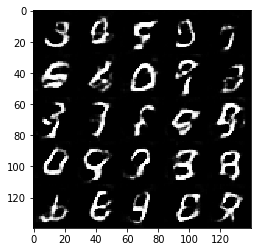

Epoch 1/2... Discriminator Loss: 1.318... Generator Loss: 0.856
Epoch 1/2... Discriminator Loss: 1.317... Generator Loss: 0.904
Epoch 1/2... Discriminator Loss: 1.345... Generator Loss: 0.862
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.834
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.807
Epoch 1/2... Discriminator Loss: 1.311... Generator Loss: 0.879
Epoch 1/2... Discriminator Loss: 1.362... Generator Loss: 0.778
Epoch 1/2... Discriminator Loss: 1.361... Generator Loss: 0.866
Epoch 1/2... Discriminator Loss: 1.292... Generator Loss: 0.874
Epoch 1/2... Discriminator Loss: 1.357... Generator Loss: 0.675


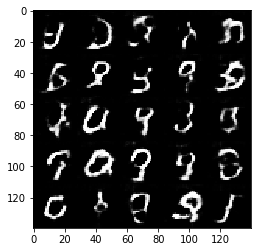

Epoch 1/2... Discriminator Loss: 1.325... Generator Loss: 0.896
Epoch 1/2... Discriminator Loss: 1.366... Generator Loss: 0.733
Epoch 1/2... Discriminator Loss: 1.310... Generator Loss: 0.814
Epoch 1/2... Discriminator Loss: 1.347... Generator Loss: 0.832
Epoch 1/2... Discriminator Loss: 1.349... Generator Loss: 0.863
Epoch 1/2... Discriminator Loss: 1.292... Generator Loss: 0.840
Epoch 1/2... Discriminator Loss: 1.347... Generator Loss: 0.792
Epoch 1/2... Discriminator Loss: 1.334... Generator Loss: 0.900
Epoch 1/2... Discriminator Loss: 1.317... Generator Loss: 0.779
Epoch 1/2... Discriminator Loss: 1.325... Generator Loss: 0.803


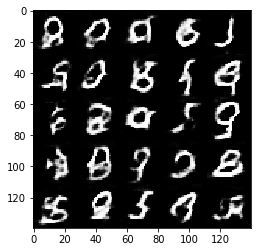

Epoch 1/2... Discriminator Loss: 1.352... Generator Loss: 0.740
Epoch 1/2... Discriminator Loss: 1.333... Generator Loss: 0.946
Epoch 1/2... Discriminator Loss: 1.343... Generator Loss: 0.765
Epoch 1/2... Discriminator Loss: 1.326... Generator Loss: 0.779
Epoch 1/2... Discriminator Loss: 1.304... Generator Loss: 0.855
Epoch 1/2... Discriminator Loss: 1.364... Generator Loss: 0.829
Epoch 1/2... Discriminator Loss: 1.359... Generator Loss: 0.894
Epoch 1/2... Discriminator Loss: 1.319... Generator Loss: 0.861
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.828
Epoch 1/2... Discriminator Loss: 1.329... Generator Loss: 0.786


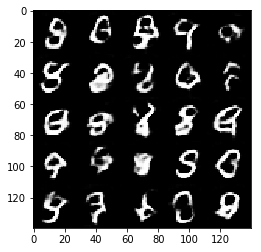

Epoch 1/2... Discriminator Loss: 1.331... Generator Loss: 0.921
Epoch 1/2... Discriminator Loss: 1.315... Generator Loss: 0.929
Epoch 1/2... Discriminator Loss: 1.344... Generator Loss: 0.769
Epoch 1/2... Discriminator Loss: 1.316... Generator Loss: 0.823
Epoch 1/2... Discriminator Loss: 1.331... Generator Loss: 0.743
Epoch 1/2... Discriminator Loss: 1.376... Generator Loss: 0.756
Epoch 1/2... Discriminator Loss: 1.337... Generator Loss: 0.796
Epoch 2/2... Discriminator Loss: 1.341... Generator Loss: 0.789
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.819
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.770


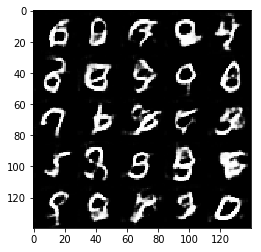

Epoch 2/2... Discriminator Loss: 1.323... Generator Loss: 0.849
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.842
Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.841
Epoch 2/2... Discriminator Loss: 1.353... Generator Loss: 0.843
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.814
Epoch 2/2... Discriminator Loss: 1.349... Generator Loss: 0.792
Epoch 2/2... Discriminator Loss: 1.355... Generator Loss: 0.862
Epoch 2/2... Discriminator Loss: 1.352... Generator Loss: 0.808
Epoch 2/2... Discriminator Loss: 1.344... Generator Loss: 0.787
Epoch 2/2... Discriminator Loss: 1.318... Generator Loss: 0.806


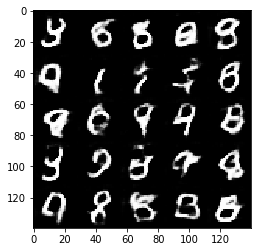

Epoch 2/2... Discriminator Loss: 1.349... Generator Loss: 0.846
Epoch 2/2... Discriminator Loss: 1.344... Generator Loss: 0.787
Epoch 2/2... Discriminator Loss: 1.330... Generator Loss: 0.865
Epoch 2/2... Discriminator Loss: 1.349... Generator Loss: 0.855
Epoch 2/2... Discriminator Loss: 1.353... Generator Loss: 0.814
Epoch 2/2... Discriminator Loss: 1.295... Generator Loss: 0.929
Epoch 2/2... Discriminator Loss: 1.307... Generator Loss: 0.807
Epoch 2/2... Discriminator Loss: 1.355... Generator Loss: 0.828
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.834
Epoch 2/2... Discriminator Loss: 1.309... Generator Loss: 0.855


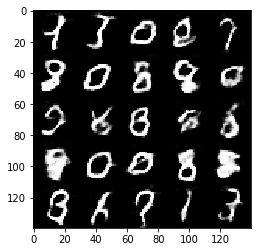

Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.833
Epoch 2/2... Discriminator Loss: 1.331... Generator Loss: 0.968
Epoch 2/2... Discriminator Loss: 1.305... Generator Loss: 0.801
Epoch 2/2... Discriminator Loss: 1.317... Generator Loss: 0.777
Epoch 2/2... Discriminator Loss: 1.350... Generator Loss: 0.813
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.804
Epoch 2/2... Discriminator Loss: 1.337... Generator Loss: 0.869
Epoch 2/2... Discriminator Loss: 1.352... Generator Loss: 0.822
Epoch 2/2... Discriminator Loss: 1.365... Generator Loss: 0.838
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.847


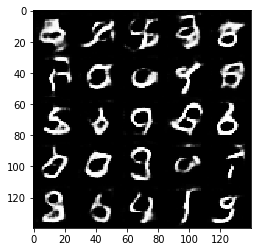

Epoch 2/2... Discriminator Loss: 1.322... Generator Loss: 0.824
Epoch 2/2... Discriminator Loss: 1.321... Generator Loss: 0.882
Epoch 2/2... Discriminator Loss: 1.339... Generator Loss: 0.909
Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.868
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.794
Epoch 2/2... Discriminator Loss: 1.306... Generator Loss: 0.869
Epoch 2/2... Discriminator Loss: 1.299... Generator Loss: 0.849
Epoch 2/2... Discriminator Loss: 1.359... Generator Loss: 0.778
Epoch 2/2... Discriminator Loss: 1.364... Generator Loss: 0.875
Epoch 2/2... Discriminator Loss: 1.332... Generator Loss: 0.880


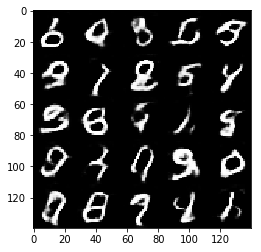

Epoch 2/2... Discriminator Loss: 1.353... Generator Loss: 0.822
Epoch 2/2... Discriminator Loss: 1.308... Generator Loss: 0.853
Epoch 2/2... Discriminator Loss: 1.360... Generator Loss: 0.773
Epoch 2/2... Discriminator Loss: 1.315... Generator Loss: 0.892
Epoch 2/2... Discriminator Loss: 1.321... Generator Loss: 0.855
Epoch 2/2... Discriminator Loss: 1.316... Generator Loss: 0.847
Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.851
Epoch 2/2... Discriminator Loss: 1.346... Generator Loss: 0.915
Epoch 2/2... Discriminator Loss: 1.363... Generator Loss: 0.807
Epoch 2/2... Discriminator Loss: 1.353... Generator Loss: 0.801


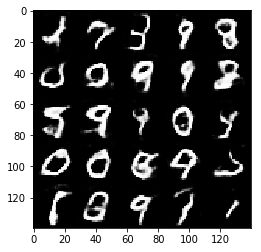

Epoch 2/2... Discriminator Loss: 1.334... Generator Loss: 0.795
Epoch 2/2... Discriminator Loss: 1.356... Generator Loss: 0.789
Epoch 2/2... Discriminator Loss: 1.337... Generator Loss: 0.827
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.855
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.883
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.828
Epoch 2/2... Discriminator Loss: 1.313... Generator Loss: 0.918
Epoch 2/2... Discriminator Loss: 1.302... Generator Loss: 0.811
Epoch 2/2... Discriminator Loss: 1.318... Generator Loss: 0.900
Epoch 2/2... Discriminator Loss: 1.354... Generator Loss: 0.901


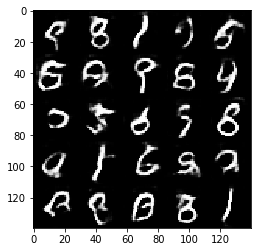

Epoch 2/2... Discriminator Loss: 1.342... Generator Loss: 0.977
Epoch 2/2... Discriminator Loss: 1.331... Generator Loss: 0.805
Epoch 2/2... Discriminator Loss: 1.357... Generator Loss: 0.833
Epoch 2/2... Discriminator Loss: 1.291... Generator Loss: 0.794
Epoch 2/2... Discriminator Loss: 1.315... Generator Loss: 0.858
Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.796
Epoch 2/2... Discriminator Loss: 1.334... Generator Loss: 0.726
Epoch 2/2... Discriminator Loss: 1.318... Generator Loss: 0.838
Epoch 2/2... Discriminator Loss: 1.328... Generator Loss: 0.881
Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.821


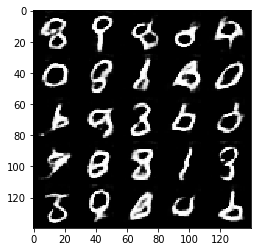

Epoch 2/2... Discriminator Loss: 1.353... Generator Loss: 0.826
Epoch 2/2... Discriminator Loss: 1.337... Generator Loss: 0.791
Epoch 2/2... Discriminator Loss: 1.294... Generator Loss: 0.871
Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.792
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.788
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.914
Epoch 2/2... Discriminator Loss: 1.351... Generator Loss: 0.837
Epoch 2/2... Discriminator Loss: 1.360... Generator Loss: 0.752
Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.740
Epoch 2/2... Discriminator Loss: 1.296... Generator Loss: 0.865


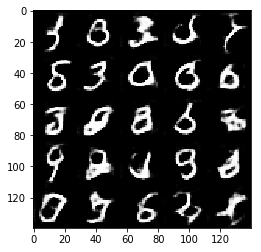

Epoch 2/2... Discriminator Loss: 1.304... Generator Loss: 0.832
Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.819
Epoch 2/2... Discriminator Loss: 1.336... Generator Loss: 0.875
Epoch 2/2... Discriminator Loss: 1.359... Generator Loss: 0.788
Epoch 2/2... Discriminator Loss: 1.328... Generator Loss: 0.816
Epoch 2/2... Discriminator Loss: 1.302... Generator Loss: 0.880
Epoch 2/2... Discriminator Loss: 1.319... Generator Loss: 0.851
Epoch 2/2... Discriminator Loss: 1.320... Generator Loss: 0.818
Epoch 2/2... Discriminator Loss: 1.317... Generator Loss: 0.896
Epoch 2/2... Discriminator Loss: 1.346... Generator Loss: 0.865


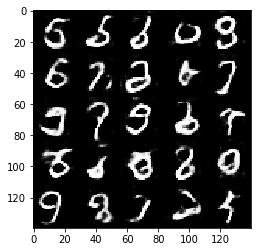

Epoch 2/2... Discriminator Loss: 1.315... Generator Loss: 0.829
Epoch 2/2... Discriminator Loss: 1.301... Generator Loss: 0.832
Epoch 2/2... Discriminator Loss: 1.314... Generator Loss: 0.891
Epoch 2/2... Discriminator Loss: 1.341... Generator Loss: 0.734
Epoch 2/2... Discriminator Loss: 1.346... Generator Loss: 0.814
Epoch 2/2... Discriminator Loss: 1.307... Generator Loss: 0.847
Epoch 2/2... Discriminator Loss: 1.323... Generator Loss: 0.818
Epoch 2/2... Discriminator Loss: 1.346... Generator Loss: 0.907
Epoch 2/2... Discriminator Loss: 1.331... Generator Loss: 0.881
Epoch 2/2... Discriminator Loss: 1.331... Generator Loss: 0.745


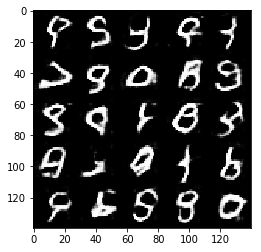

Epoch 2/2... Discriminator Loss: 1.371... Generator Loss: 0.775
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.856
Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.769
Epoch 2/2... Discriminator Loss: 1.313... Generator Loss: 0.898
Epoch 2/2... Discriminator Loss: 1.318... Generator Loss: 0.830
Epoch 2/2... Discriminator Loss: 1.312... Generator Loss: 0.878
Epoch 2/2... Discriminator Loss: 1.341... Generator Loss: 0.796
Epoch 2/2... Discriminator Loss: 1.308... Generator Loss: 0.945
Epoch 2/2... Discriminator Loss: 1.335... Generator Loss: 0.875
Epoch 2/2... Discriminator Loss: 1.311... Generator Loss: 0.813


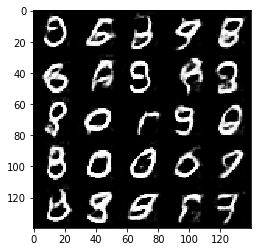

Epoch 2/2... Discriminator Loss: 1.325... Generator Loss: 0.839
Epoch 2/2... Discriminator Loss: 1.313... Generator Loss: 0.900
Epoch 2/2... Discriminator Loss: 1.317... Generator Loss: 0.834
Epoch 2/2... Discriminator Loss: 1.354... Generator Loss: 0.779
Epoch 2/2... Discriminator Loss: 1.357... Generator Loss: 0.792
Epoch 2/2... Discriminator Loss: 1.332... Generator Loss: 0.915
Epoch 2/2... Discriminator Loss: 1.323... Generator Loss: 0.845
Epoch 2/2... Discriminator Loss: 1.263... Generator Loss: 0.874
Epoch 2/2... Discriminator Loss: 1.305... Generator Loss: 0.802
Epoch 2/2... Discriminator Loss: 1.370... Generator Loss: 0.780


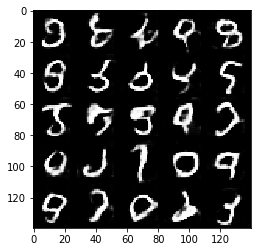

Epoch 2/2... Discriminator Loss: 1.352... Generator Loss: 0.844
Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.749
Epoch 2/2... Discriminator Loss: 1.309... Generator Loss: 0.776
Epoch 2/2... Discriminator Loss: 1.366... Generator Loss: 0.799
Epoch 2/2... Discriminator Loss: 1.365... Generator Loss: 0.759
Epoch 2/2... Discriminator Loss: 1.313... Generator Loss: 0.803
Epoch 2/2... Discriminator Loss: 1.317... Generator Loss: 0.959
Epoch 2/2... Discriminator Loss: 1.304... Generator Loss: 0.886
Epoch 2/2... Discriminator Loss: 1.328... Generator Loss: 0.796
Epoch 2/2... Discriminator Loss: 1.325... Generator Loss: 0.942


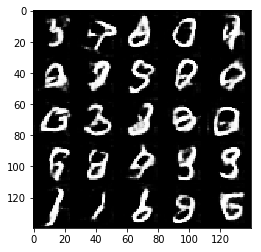

Epoch 2/2... Discriminator Loss: 1.381... Generator Loss: 0.693
Epoch 2/2... Discriminator Loss: 1.297... Generator Loss: 0.778
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.853
Epoch 2/2... Discriminator Loss: 1.344... Generator Loss: 0.742
Epoch 2/2... Discriminator Loss: 1.320... Generator Loss: 0.871
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.905
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.758
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.817
Epoch 2/2... Discriminator Loss: 1.308... Generator Loss: 0.835
Epoch 2/2... Discriminator Loss: 1.327... Generator Loss: 0.877


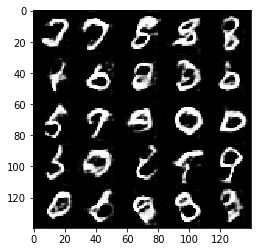

Epoch 2/2... Discriminator Loss: 1.314... Generator Loss: 0.801
Epoch 2/2... Discriminator Loss: 1.347... Generator Loss: 0.813
Epoch 2/2... Discriminator Loss: 1.317... Generator Loss: 0.892
Epoch 2/2... Discriminator Loss: 1.363... Generator Loss: 0.764
Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.854
Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.859
Epoch 2/2... Discriminator Loss: 1.327... Generator Loss: 0.892
Epoch 2/2... Discriminator Loss: 1.290... Generator Loss: 0.776
Epoch 2/2... Discriminator Loss: 1.329... Generator Loss: 0.965
Epoch 2/2... Discriminator Loss: 1.313... Generator Loss: 0.901


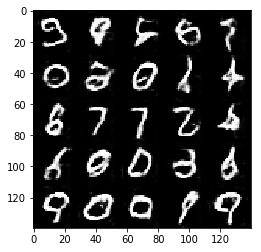

Epoch 2/2... Discriminator Loss: 1.285... Generator Loss: 0.830
Epoch 2/2... Discriminator Loss: 1.307... Generator Loss: 0.856
Epoch 2/2... Discriminator Loss: 1.328... Generator Loss: 0.787
Epoch 2/2... Discriminator Loss: 1.339... Generator Loss: 0.783
Epoch 2/2... Discriminator Loss: 1.305... Generator Loss: 0.823
Epoch 2/2... Discriminator Loss: 1.374... Generator Loss: 0.834
Epoch 2/2... Discriminator Loss: 1.349... Generator Loss: 0.909
Epoch 2/2... Discriminator Loss: 1.301... Generator Loss: 0.921
Epoch 2/2... Discriminator Loss: 1.332... Generator Loss: 0.960
Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.888


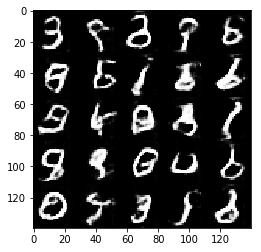

Epoch 2/2... Discriminator Loss: 1.343... Generator Loss: 0.941
Epoch 2/2... Discriminator Loss: 1.279... Generator Loss: 0.862
Epoch 2/2... Discriminator Loss: 1.340... Generator Loss: 0.764
Epoch 2/2... Discriminator Loss: 1.329... Generator Loss: 0.834
Epoch 2/2... Discriminator Loss: 1.337... Generator Loss: 0.882
Epoch 2/2... Discriminator Loss: 1.347... Generator Loss: 0.975
Epoch 2/2... Discriminator Loss: 1.347... Generator Loss: 0.895
Epoch 2/2... Discriminator Loss: 1.324... Generator Loss: 0.868
Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.905
Epoch 2/2... Discriminator Loss: 1.356... Generator Loss: 0.802


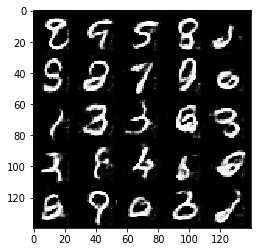

Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.755
Epoch 2/2... Discriminator Loss: 1.306... Generator Loss: 0.903
Epoch 2/2... Discriminator Loss: 1.316... Generator Loss: 0.893
Epoch 2/2... Discriminator Loss: 1.315... Generator Loss: 0.837
Epoch 2/2... Discriminator Loss: 1.325... Generator Loss: 0.770
Epoch 2/2... Discriminator Loss: 1.310... Generator Loss: 0.813
Epoch 2/2... Discriminator Loss: 1.332... Generator Loss: 0.768
Epoch 2/2... Discriminator Loss: 1.345... Generator Loss: 0.822
Epoch 2/2... Discriminator Loss: 1.319... Generator Loss: 0.772
Epoch 2/2... Discriminator Loss: 1.327... Generator Loss: 0.847


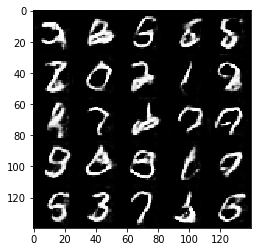

Epoch 2/2... Discriminator Loss: 1.333... Generator Loss: 0.802
Epoch 2/2... Discriminator Loss: 1.357... Generator Loss: 0.831
Epoch 2/2... Discriminator Loss: 1.341... Generator Loss: 0.910
Epoch 2/2... Discriminator Loss: 1.326... Generator Loss: 0.894
Epoch 2/2... Discriminator Loss: 1.338... Generator Loss: 0.993


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.202... Generator Loss: 0.447
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.829
Epoch 1/1... Discriminator Loss: 1.459... Generator Loss: 0.852
Epoch 1/1... Discriminator Loss: 1.349... Generator Loss: 0.937
Epoch 1/1... Discriminator Loss: 1.456... Generator Loss: 0.972
Epoch 1/1... Discriminator Loss: 1.361... Generator Loss: 0.837
Epoch 1/1... Discriminator Loss: 1.105... Generator Loss: 1.145
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 1.031
Epoch 1/1... Discriminator Loss: 0.972... Generator Loss: 1.454
Epoch 1/1... Discriminator Loss: 1.266... Generator Loss: 0.937


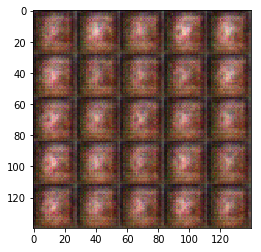

Epoch 1/1... Discriminator Loss: 1.262... Generator Loss: 0.943
Epoch 1/1... Discriminator Loss: 1.224... Generator Loss: 1.092
Epoch 1/1... Discriminator Loss: 1.551... Generator Loss: 1.054
Epoch 1/1... Discriminator Loss: 1.618... Generator Loss: 1.080
Epoch 1/1... Discriminator Loss: 1.219... Generator Loss: 0.923
Epoch 1/1... Discriminator Loss: 1.196... Generator Loss: 1.037
Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.949
Epoch 1/1... Discriminator Loss: 0.960... Generator Loss: 1.168
Epoch 1/1... Discriminator Loss: 1.350... Generator Loss: 1.287
Epoch 1/1... Discriminator Loss: 1.419... Generator Loss: 1.006


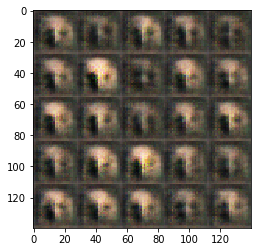

Epoch 1/1... Discriminator Loss: 1.138... Generator Loss: 1.056
Epoch 1/1... Discriminator Loss: 1.302... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.319... Generator Loss: 1.008
Epoch 1/1... Discriminator Loss: 1.301... Generator Loss: 0.859
Epoch 1/1... Discriminator Loss: 1.122... Generator Loss: 1.037
Epoch 1/1... Discriminator Loss: 1.189... Generator Loss: 1.090
Epoch 1/1... Discriminator Loss: 1.076... Generator Loss: 1.017
Epoch 1/1... Discriminator Loss: 1.130... Generator Loss: 1.003
Epoch 1/1... Discriminator Loss: 1.139... Generator Loss: 0.976
Epoch 1/1... Discriminator Loss: 1.150... Generator Loss: 0.964


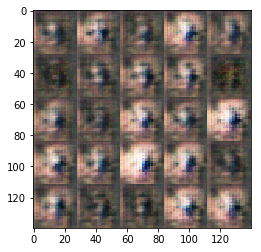

Epoch 1/1... Discriminator Loss: 0.965... Generator Loss: 1.330
Epoch 1/1... Discriminator Loss: 1.172... Generator Loss: 1.118
Epoch 1/1... Discriminator Loss: 1.088... Generator Loss: 0.944
Epoch 1/1... Discriminator Loss: 1.644... Generator Loss: 1.178
Epoch 1/1... Discriminator Loss: 1.534... Generator Loss: 0.922
Epoch 1/1... Discriminator Loss: 1.181... Generator Loss: 1.117
Epoch 1/1... Discriminator Loss: 1.164... Generator Loss: 1.109
Epoch 1/1... Discriminator Loss: 1.491... Generator Loss: 1.100
Epoch 1/1... Discriminator Loss: 1.102... Generator Loss: 1.139
Epoch 1/1... Discriminator Loss: 1.318... Generator Loss: 0.962


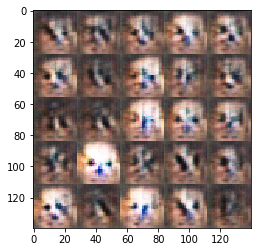

Epoch 1/1... Discriminator Loss: 1.292... Generator Loss: 0.883
Epoch 1/1... Discriminator Loss: 1.207... Generator Loss: 0.994
Epoch 1/1... Discriminator Loss: 1.327... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.527... Generator Loss: 0.799
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 1.305
Epoch 1/1... Discriminator Loss: 1.377... Generator Loss: 0.819
Epoch 1/1... Discriminator Loss: 1.221... Generator Loss: 0.968
Epoch 1/1... Discriminator Loss: 1.591... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.462... Generator Loss: 0.919
Epoch 1/1... Discriminator Loss: 1.365... Generator Loss: 0.805


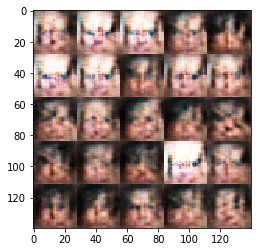

Epoch 1/1... Discriminator Loss: 1.174... Generator Loss: 0.991
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.748
Epoch 1/1... Discriminator Loss: 1.570... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.323... Generator Loss: 0.945
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.914
Epoch 1/1... Discriminator Loss: 1.260... Generator Loss: 0.940
Epoch 1/1... Discriminator Loss: 1.375... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.532... Generator Loss: 0.943
Epoch 1/1... Discriminator Loss: 1.359... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.756... Generator Loss: 1.449


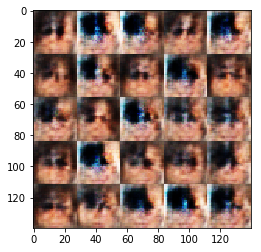

Epoch 1/1... Discriminator Loss: 1.413... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.298... Generator Loss: 0.977
Epoch 1/1... Discriminator Loss: 1.331... Generator Loss: 0.840
Epoch 1/1... Discriminator Loss: 1.421... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.350... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.314... Generator Loss: 0.920
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.941
Epoch 1/1... Discriminator Loss: 1.351... Generator Loss: 0.914
Epoch 1/1... Discriminator Loss: 1.368... Generator Loss: 0.842
Epoch 1/1... Discriminator Loss: 1.472... Generator Loss: 0.708


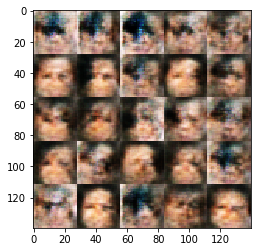

Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.915
Epoch 1/1... Discriminator Loss: 1.492... Generator Loss: 0.757
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.826
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.740
Epoch 1/1... Discriminator Loss: 1.295... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.479... Generator Loss: 0.846
Epoch 1/1... Discriminator Loss: 1.468... Generator Loss: 0.856
Epoch 1/1... Discriminator Loss: 1.715... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.509... Generator Loss: 0.886
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.784


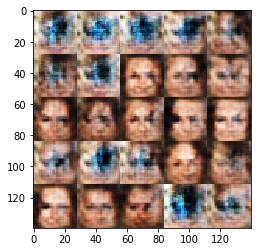

Epoch 1/1... Discriminator Loss: 1.551... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.391... Generator Loss: 0.803
Epoch 1/1... Discriminator Loss: 1.339... Generator Loss: 0.978
Epoch 1/1... Discriminator Loss: 1.298... Generator Loss: 0.888
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.833
Epoch 1/1... Discriminator Loss: 1.496... Generator Loss: 0.729
Epoch 1/1... Discriminator Loss: 1.489... Generator Loss: 0.696
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.825
Epoch 1/1... Discriminator Loss: 1.577... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.501... Generator Loss: 0.989


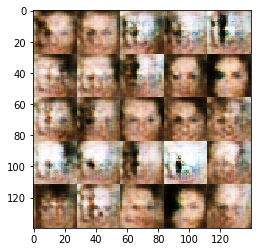

Epoch 1/1... Discriminator Loss: 1.358... Generator Loss: 0.875
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.824
Epoch 1/1... Discriminator Loss: 1.341... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.561... Generator Loss: 0.690
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 1.047
Epoch 1/1... Discriminator Loss: 1.344... Generator Loss: 0.949
Epoch 1/1... Discriminator Loss: 1.456... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.349... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 0.955
Epoch 1/1... Discriminator Loss: 1.437... Generator Loss: 0.784


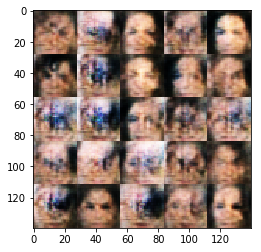

Epoch 1/1... Discriminator Loss: 1.331... Generator Loss: 0.998
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.923
Epoch 1/1... Discriminator Loss: 1.488... Generator Loss: 0.720
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.448... Generator Loss: 0.701
Epoch 1/1... Discriminator Loss: 1.360... Generator Loss: 0.911
Epoch 1/1... Discriminator Loss: 1.329... Generator Loss: 0.966
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.810
Epoch 1/1... Discriminator Loss: 1.447... Generator Loss: 0.751
Epoch 1/1... Discriminator Loss: 1.454... Generator Loss: 0.558


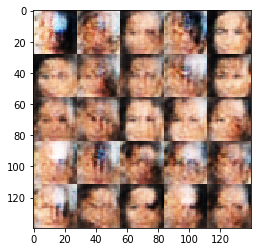

Epoch 1/1... Discriminator Loss: 1.554... Generator Loss: 0.800
Epoch 1/1... Discriminator Loss: 1.318... Generator Loss: 0.876
Epoch 1/1... Discriminator Loss: 1.420... Generator Loss: 0.709
Epoch 1/1... Discriminator Loss: 1.369... Generator Loss: 1.003
Epoch 1/1... Discriminator Loss: 1.362... Generator Loss: 0.849
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.492... Generator Loss: 0.673
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.872
Epoch 1/1... Discriminator Loss: 1.501... Generator Loss: 0.772
Epoch 1/1... Discriminator Loss: 1.433... Generator Loss: 0.632


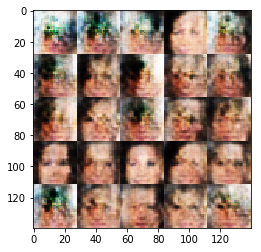

Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 0.857
Epoch 1/1... Discriminator Loss: 1.494... Generator Loss: 1.053
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.951
Epoch 1/1... Discriminator Loss: 1.371... Generator Loss: 0.828
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 1.136
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.473... Generator Loss: 0.670
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.877
Epoch 1/1... Discriminator Loss: 1.495... Generator Loss: 0.761


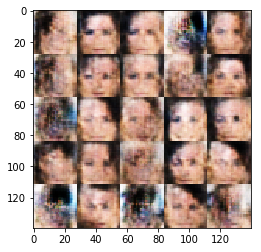

Epoch 1/1... Discriminator Loss: 1.464... Generator Loss: 0.999
Epoch 1/1... Discriminator Loss: 1.413... Generator Loss: 0.846
Epoch 1/1... Discriminator Loss: 1.386... Generator Loss: 0.870
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.807
Epoch 1/1... Discriminator Loss: 1.510... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.487... Generator Loss: 0.683
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.887
Epoch 1/1... Discriminator Loss: 1.567... Generator Loss: 0.912
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.894


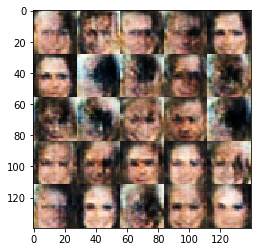

Epoch 1/1... Discriminator Loss: 1.460... Generator Loss: 0.796
Epoch 1/1... Discriminator Loss: 1.348... Generator Loss: 0.884
Epoch 1/1... Discriminator Loss: 1.444... Generator Loss: 0.627
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.789
Epoch 1/1... Discriminator Loss: 1.523... Generator Loss: 0.747
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.754
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.663
Epoch 1/1... Discriminator Loss: 1.459... Generator Loss: 0.812
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.459... Generator Loss: 1.016


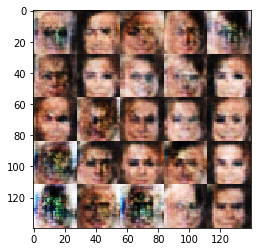

Epoch 1/1... Discriminator Loss: 1.421... Generator Loss: 0.909
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.773
Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.417... Generator Loss: 0.711
Epoch 1/1... Discriminator Loss: 1.524... Generator Loss: 1.140
Epoch 1/1... Discriminator Loss: 1.476... Generator Loss: 0.724
Epoch 1/1... Discriminator Loss: 1.512... Generator Loss: 0.788
Epoch 1/1... Discriminator Loss: 1.486... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.720
Epoch 1/1... Discriminator Loss: 1.419... Generator Loss: 0.800


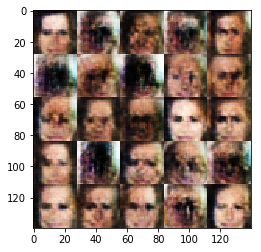

Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.902
Epoch 1/1... Discriminator Loss: 1.452... Generator Loss: 0.801
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.809
Epoch 1/1... Discriminator Loss: 1.391... Generator Loss: 0.779
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.924
Epoch 1/1... Discriminator Loss: 1.375... Generator Loss: 0.889
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.899
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.872
Epoch 1/1... Discriminator Loss: 1.495... Generator Loss: 0.870
Epoch 1/1... Discriminator Loss: 1.385... Generator Loss: 0.750


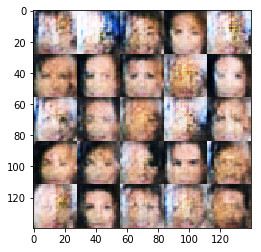

Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.878
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.789
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.725
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.671
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.958
Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.749
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.797


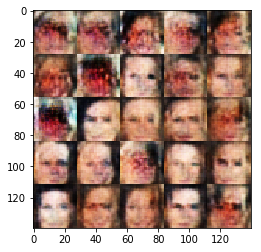

Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.687
Epoch 1/1... Discriminator Loss: 1.371... Generator Loss: 0.779
Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.334... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.423... Generator Loss: 0.830
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.894
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.897


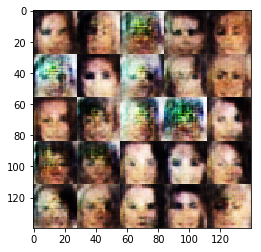

Epoch 1/1... Discriminator Loss: 1.334... Generator Loss: 0.908
Epoch 1/1... Discriminator Loss: 1.369... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.810
Epoch 1/1... Discriminator Loss: 1.369... Generator Loss: 1.001
Epoch 1/1... Discriminator Loss: 1.478... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.706
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.757
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.950
Epoch 1/1... Discriminator Loss: 1.351... Generator Loss: 0.801
Epoch 1/1... Discriminator Loss: 1.372... Generator Loss: 0.842


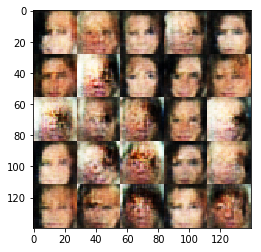

Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.765
Epoch 1/1... Discriminator Loss: 1.391... Generator Loss: 0.858
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.728
Epoch 1/1... Discriminator Loss: 1.379... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 1.075
Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.736
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.668
Epoch 1/1... Discriminator Loss: 1.362... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.444... Generator Loss: 0.627
Epoch 1/1... Discriminator Loss: 1.388... Generator Loss: 0.733


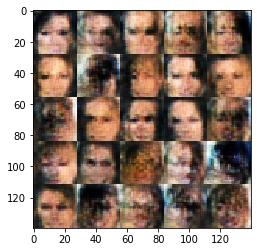

Epoch 1/1... Discriminator Loss: 1.483... Generator Loss: 0.930
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.775
Epoch 1/1... Discriminator Loss: 1.374... Generator Loss: 0.915
Epoch 1/1... Discriminator Loss: 1.462... Generator Loss: 0.912
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.727
Epoch 1/1... Discriminator Loss: 1.407... Generator Loss: 0.780
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.360... Generator Loss: 0.811


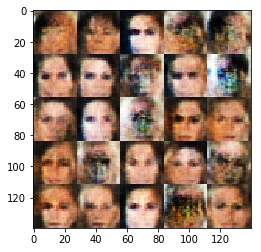

Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.770
Epoch 1/1... Discriminator Loss: 1.484... Generator Loss: 0.703
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.881
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.775
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.735
Epoch 1/1... Discriminator Loss: 1.501... Generator Loss: 0.782
Epoch 1/1... Discriminator Loss: 1.357... Generator Loss: 0.884
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.891
Epoch 1/1... Discriminator Loss: 1.476... Generator Loss: 0.860


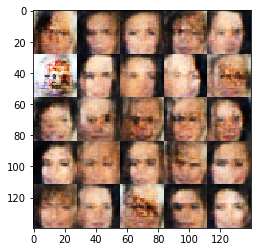

Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.801
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.834
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.498... Generator Loss: 0.954
Epoch 1/1... Discriminator Loss: 1.464... Generator Loss: 0.859
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 0.730
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.754
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.879
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.713


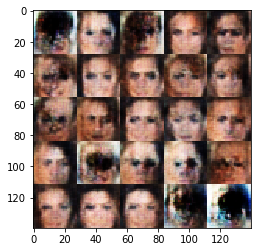

Epoch 1/1... Discriminator Loss: 1.420... Generator Loss: 0.705
Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 0.794
Epoch 1/1... Discriminator Loss: 1.377... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.417... Generator Loss: 0.751
Epoch 1/1... Discriminator Loss: 1.362... Generator Loss: 0.908
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.949
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.616
Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.825
Epoch 1/1... Discriminator Loss: 1.366... Generator Loss: 0.759


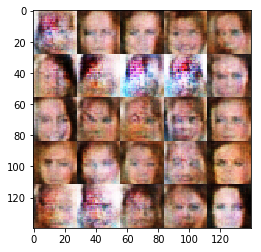

Epoch 1/1... Discriminator Loss: 1.423... Generator Loss: 0.857
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.837
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.835
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.909
Epoch 1/1... Discriminator Loss: 1.379... Generator Loss: 0.900
Epoch 1/1... Discriminator Loss: 1.500... Generator Loss: 0.950
Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.799
Epoch 1/1... Discriminator Loss: 1.478... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.494... Generator Loss: 0.684
Epoch 1/1... Discriminator Loss: 1.507... Generator Loss: 0.915


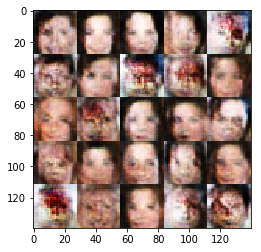

Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.400... Generator Loss: 0.853
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.854
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.819
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.825
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.723
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.822
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.907


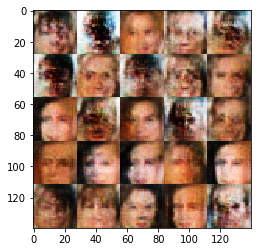

Epoch 1/1... Discriminator Loss: 1.480... Generator Loss: 0.917
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.867
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.857
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.867
Epoch 1/1... Discriminator Loss: 1.451... Generator Loss: 0.664
Epoch 1/1... Discriminator Loss: 1.413... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.418... Generator Loss: 0.846
Epoch 1/1... Discriminator Loss: 1.472... Generator Loss: 0.877
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.857
Epoch 1/1... Discriminator Loss: 1.404... Generator Loss: 0.924


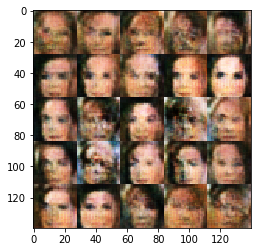

Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.674
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.796
Epoch 1/1... Discriminator Loss: 1.468... Generator Loss: 0.682
Epoch 1/1... Discriminator Loss: 1.484... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.890
Epoch 1/1... Discriminator Loss: 1.467... Generator Loss: 0.664
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.809
Epoch 1/1... Discriminator Loss: 1.455... Generator Loss: 0.734
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.417... Generator Loss: 0.731


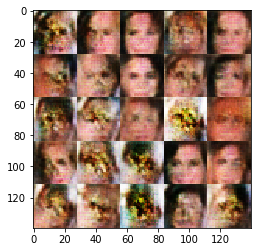

Epoch 1/1... Discriminator Loss: 1.372... Generator Loss: 0.777
Epoch 1/1... Discriminator Loss: 1.437... Generator Loss: 0.679
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.740
Epoch 1/1... Discriminator Loss: 1.418... Generator Loss: 0.801
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.438... Generator Loss: 0.735
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.772
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.670
Epoch 1/1... Discriminator Loss: 1.537... Generator Loss: 0.739
Epoch 1/1... Discriminator Loss: 1.374... Generator Loss: 0.926


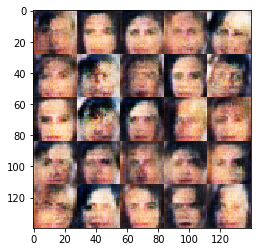

Epoch 1/1... Discriminator Loss: 1.485... Generator Loss: 0.677
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 0.900
Epoch 1/1... Discriminator Loss: 1.388... Generator Loss: 0.827
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.862
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.836
Epoch 1/1... Discriminator Loss: 1.463... Generator Loss: 0.697
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.839
Epoch 1/1... Discriminator Loss: 1.438... Generator Loss: 0.768
Epoch 1/1... Discriminator Loss: 1.407... Generator Loss: 0.909
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.731


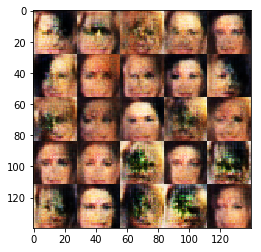

Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.801
Epoch 1/1... Discriminator Loss: 1.288... Generator Loss: 0.874
Epoch 1/1... Discriminator Loss: 1.366... Generator Loss: 0.932
Epoch 1/1... Discriminator Loss: 1.536... Generator Loss: 0.941
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.743
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.718
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 0.792
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.856
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.377... Generator Loss: 0.845


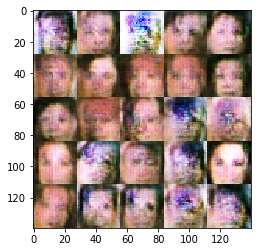

Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.852
Epoch 1/1... Discriminator Loss: 1.445... Generator Loss: 0.687
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.468... Generator Loss: 0.879
Epoch 1/1... Discriminator Loss: 1.471... Generator Loss: 0.747
Epoch 1/1... Discriminator Loss: 1.470... Generator Loss: 0.791
Epoch 1/1... Discriminator Loss: 1.470... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.558... Generator Loss: 0.805


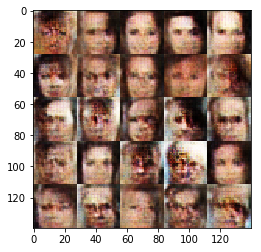

Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.838
Epoch 1/1... Discriminator Loss: 1.483... Generator Loss: 0.738
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.769
Epoch 1/1... Discriminator Loss: 1.460... Generator Loss: 0.822
Epoch 1/1... Discriminator Loss: 1.471... Generator Loss: 0.841
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.769
Epoch 1/1... Discriminator Loss: 1.325... Generator Loss: 0.950
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.715
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.733


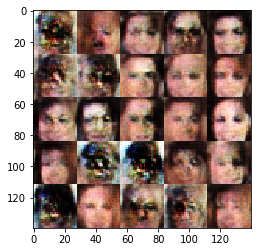

Epoch 1/1... Discriminator Loss: 1.370... Generator Loss: 0.842
Epoch 1/1... Discriminator Loss: 1.388... Generator Loss: 0.706
Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.723
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.538... Generator Loss: 1.024
Epoch 1/1... Discriminator Loss: 1.363... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.420... Generator Loss: 0.851


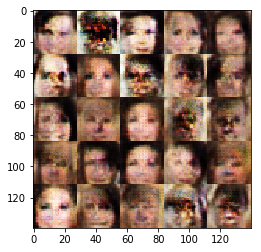

Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.833
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.845
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.857
Epoch 1/1... Discriminator Loss: 1.382... Generator Loss: 0.818
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.766
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.839
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.400... Generator Loss: 0.700
Epoch 1/1... Discriminator Loss: 1.490... Generator Loss: 0.844
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.697


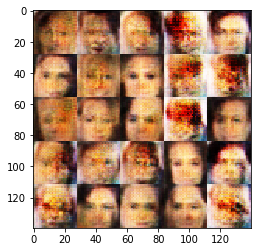

Epoch 1/1... Discriminator Loss: 1.438... Generator Loss: 0.915
Epoch 1/1... Discriminator Loss: 1.424... Generator Loss: 0.813
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.787
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.808
Epoch 1/1... Discriminator Loss: 1.433... Generator Loss: 0.750
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.685
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.463... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.754


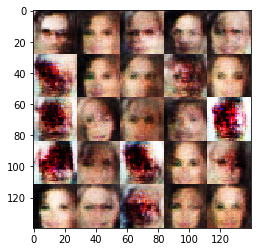

Epoch 1/1... Discriminator Loss: 1.447... Generator Loss: 0.792
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.821
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.779
Epoch 1/1... Discriminator Loss: 1.371... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.420... Generator Loss: 0.713
Epoch 1/1... Discriminator Loss: 1.362... Generator Loss: 0.799
Epoch 1/1... Discriminator Loss: 1.358... Generator Loss: 0.792
Epoch 1/1... Discriminator Loss: 1.581... Generator Loss: 0.974
Epoch 1/1... Discriminator Loss: 1.449... Generator Loss: 0.794
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.988


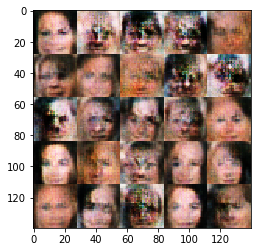

Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.433... Generator Loss: 0.743
Epoch 1/1... Discriminator Loss: 1.477... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.458... Generator Loss: 0.788
Epoch 1/1... Discriminator Loss: 1.560... Generator Loss: 0.690
Epoch 1/1... Discriminator Loss: 1.361... Generator Loss: 0.893
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.404... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.753


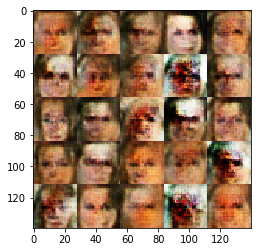

Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.772
Epoch 1/1... Discriminator Loss: 1.354... Generator Loss: 0.874
Epoch 1/1... Discriminator Loss: 1.364... Generator Loss: 0.850
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.862
Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.809
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.695
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.820
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.777
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.835


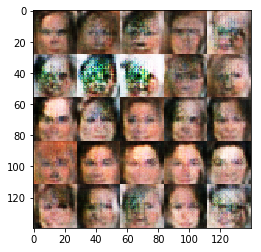

Epoch 1/1... Discriminator Loss: 1.388... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.751
Epoch 1/1... Discriminator Loss: 1.385... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.738
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.730
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.855
Epoch 1/1... Discriminator Loss: 1.407... Generator Loss: 0.957
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.386... Generator Loss: 0.810


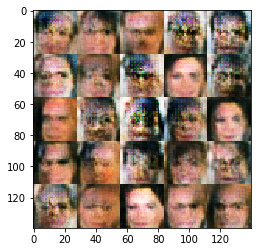

Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.739
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.907
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.446... Generator Loss: 0.794
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.404... Generator Loss: 0.800
Epoch 1/1... Discriminator Loss: 1.448... Generator Loss: 0.727
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.885
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 0.794
Epoch 1/1... Discriminator Loss: 1.421... Generator Loss: 0.815


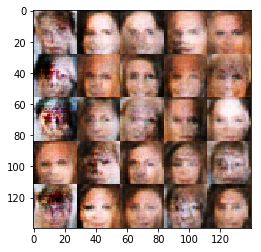

Epoch 1/1... Discriminator Loss: 1.375... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.484... Generator Loss: 0.846
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.824
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.709
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.811
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.822
Epoch 1/1... Discriminator Loss: 1.335... Generator Loss: 0.830
Epoch 1/1... Discriminator Loss: 1.437... Generator Loss: 0.715
Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.811


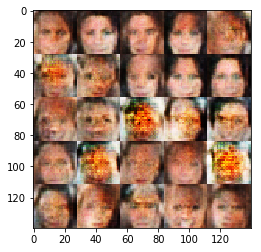

Epoch 1/1... Discriminator Loss: 1.438... Generator Loss: 0.844
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.747
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 0.772
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.776
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.387... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.449... Generator Loss: 0.702
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.855
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.869


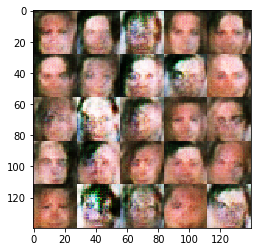

Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.710
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.802
Epoch 1/1... Discriminator Loss: 1.473... Generator Loss: 0.862
Epoch 1/1... Discriminator Loss: 1.447... Generator Loss: 0.736
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.715
Epoch 1/1... Discriminator Loss: 1.397... Generator Loss: 0.837
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.420... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.746
Epoch 1/1... Discriminator Loss: 1.497... Generator Loss: 0.743


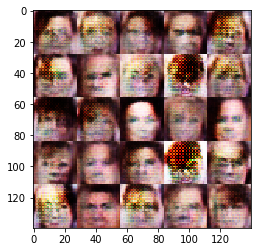

Epoch 1/1... Discriminator Loss: 1.335... Generator Loss: 0.880
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.486... Generator Loss: 0.834
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.688
Epoch 1/1... Discriminator Loss: 1.456... Generator Loss: 0.789
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.479... Generator Loss: 0.734
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.743
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.744


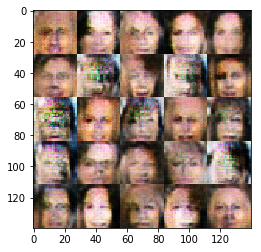

Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.694
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.775
Epoch 1/1... Discriminator Loss: 1.372... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.765
Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.746
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.788
Epoch 1/1... Discriminator Loss: 1.397... Generator Loss: 0.699
Epoch 1/1... Discriminator Loss: 1.429... Generator Loss: 0.735
Epoch 1/1... Discriminator Loss: 1.442... Generator Loss: 0.780
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.800


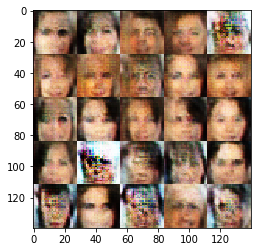

Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.721
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.868
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.782
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.912
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.848
Epoch 1/1... Discriminator Loss: 1.374... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.808
Epoch 1/1... Discriminator Loss: 1.439... Generator Loss: 0.747


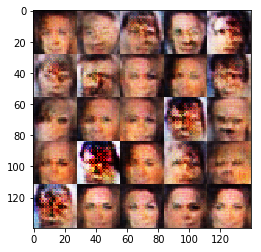

Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.737
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.418... Generator Loss: 0.815
Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.702
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.694
Epoch 1/1... Discriminator Loss: 1.418... Generator Loss: 0.792
Epoch 1/1... Discriminator Loss: 1.425... Generator Loss: 0.709
Epoch 1/1... Discriminator Loss: 1.469... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.738


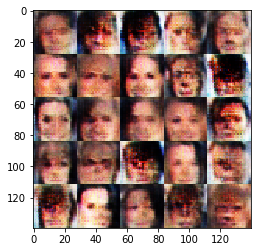

Epoch 1/1... Discriminator Loss: 1.440... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.437... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.471... Generator Loss: 0.796
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.734
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.455... Generator Loss: 0.693
Epoch 1/1... Discriminator Loss: 1.486... Generator Loss: 0.772
Epoch 1/1... Discriminator Loss: 1.382... Generator Loss: 0.770
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.775


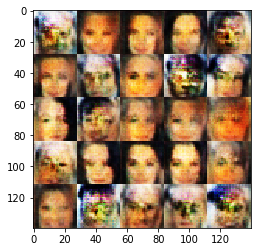

Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.908
Epoch 1/1... Discriminator Loss: 1.435... Generator Loss: 0.768
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.735
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 0.849
Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.825
Epoch 1/1... Discriminator Loss: 1.401... Generator Loss: 0.791
Epoch 1/1... Discriminator Loss: 1.413... Generator Loss: 0.850
Epoch 1/1... Discriminator Loss: 1.385... Generator Loss: 0.825
Epoch 1/1... Discriminator Loss: 1.453... Generator Loss: 0.739


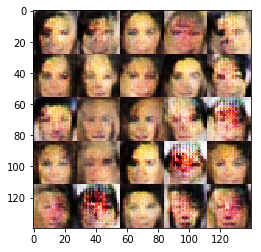

Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.750
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.732
Epoch 1/1... Discriminator Loss: 1.430... Generator Loss: 0.820
Epoch 1/1... Discriminator Loss: 1.450... Generator Loss: 0.755
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.770
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.828
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.753
Epoch 1/1... Discriminator Loss: 1.366... Generator Loss: 0.766
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.778
Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.799


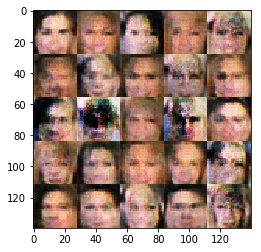

Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.397... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.366... Generator Loss: 0.888
Epoch 1/1... Discriminator Loss: 1.385... Generator Loss: 0.858
Epoch 1/1... Discriminator Loss: 1.382... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.761
Epoch 1/1... Discriminator Loss: 1.547... Generator Loss: 0.898
Epoch 1/1... Discriminator Loss: 1.383... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.759
Epoch 1/1... Discriminator Loss: 1.376... Generator Loss: 0.858


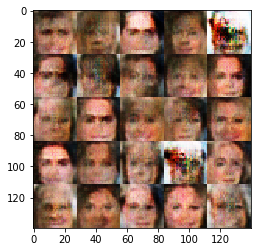

Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.809
Epoch 1/1... Discriminator Loss: 1.471... Generator Loss: 0.762
Epoch 1/1... Discriminator Loss: 1.467... Generator Loss: 0.828
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.773
Epoch 1/1... Discriminator Loss: 1.471... Generator Loss: 0.689
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.746
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.347... Generator Loss: 0.877
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.806
Epoch 1/1... Discriminator Loss: 1.409... Generator Loss: 0.742


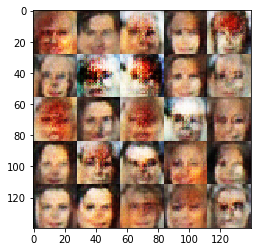

Epoch 1/1... Discriminator Loss: 1.534... Generator Loss: 0.942
Epoch 1/1... Discriminator Loss: 1.461... Generator Loss: 0.716
Epoch 1/1... Discriminator Loss: 1.353... Generator Loss: 0.854
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.796
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.743
Epoch 1/1... Discriminator Loss: 1.360... Generator Loss: 0.805
Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.764
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.740
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.805


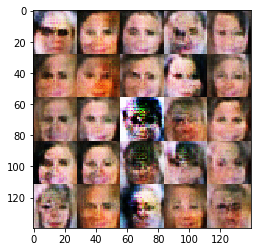

Epoch 1/1... Discriminator Loss: 1.357... Generator Loss: 0.898
Epoch 1/1... Discriminator Loss: 1.512... Generator Loss: 0.763
Epoch 1/1... Discriminator Loss: 1.466... Generator Loss: 0.832
Epoch 1/1... Discriminator Loss: 1.357... Generator Loss: 0.827
Epoch 1/1... Discriminator Loss: 1.457... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.436... Generator Loss: 0.715
Epoch 1/1... Discriminator Loss: 1.384... Generator Loss: 0.836
Epoch 1/1... Discriminator Loss: 1.415... Generator Loss: 0.783
Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.900
Epoch 1/1... Discriminator Loss: 1.431... Generator Loss: 0.724


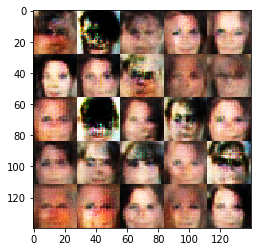

Epoch 1/1... Discriminator Loss: 1.372... Generator Loss: 0.867
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.841
Epoch 1/1... Discriminator Loss: 1.444... Generator Loss: 0.757
Epoch 1/1... Discriminator Loss: 1.379... Generator Loss: 0.819
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 0.782
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.764
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.817
Epoch 1/1... Discriminator Loss: 1.386... Generator Loss: 0.729
Epoch 1/1... Discriminator Loss: 1.399... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.403... Generator Loss: 0.804


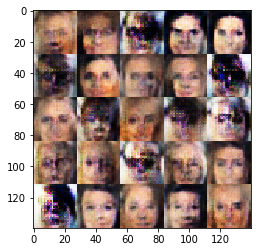

Epoch 1/1... Discriminator Loss: 1.380... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.741
Epoch 1/1... Discriminator Loss: 1.410... Generator Loss: 0.876
Epoch 1/1... Discriminator Loss: 1.414... Generator Loss: 0.786
Epoch 1/1... Discriminator Loss: 1.419... Generator Loss: 0.823
Epoch 1/1... Discriminator Loss: 1.368... Generator Loss: 0.919
Epoch 1/1... Discriminator Loss: 1.416... Generator Loss: 0.810
Epoch 1/1... Discriminator Loss: 1.392... Generator Loss: 0.788
Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.773
Epoch 1/1... Discriminator Loss: 1.364... Generator Loss: 0.817


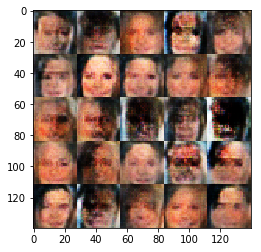

Epoch 1/1... Discriminator Loss: 1.408... Generator Loss: 0.799
Epoch 1/1... Discriminator Loss: 1.404... Generator Loss: 0.810
Epoch 1/1... Discriminator Loss: 1.380... Generator Loss: 0.776
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.422... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.393... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 0.843
Epoch 1/1... Discriminator Loss: 1.448... Generator Loss: 0.831
Epoch 1/1... Discriminator Loss: 1.356... Generator Loss: 0.769
Epoch 1/1... Discriminator Loss: 1.432... Generator Loss: 0.728


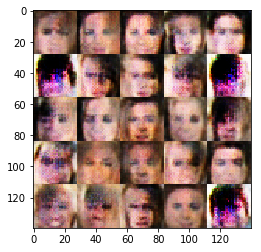

Epoch 1/1... Discriminator Loss: 1.481... Generator Loss: 0.804
Epoch 1/1... Discriminator Loss: 1.402... Generator Loss: 0.721
Epoch 1/1... Discriminator Loss: 1.374... Generator Loss: 0.790
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.750
Epoch 1/1... Discriminator Loss: 1.390... Generator Loss: 0.805
Epoch 1/1... Discriminator Loss: 1.426... Generator Loss: 0.852
Epoch 1/1... Discriminator Loss: 1.378... Generator Loss: 0.769
Epoch 1/1... Discriminator Loss: 1.454... Generator Loss: 0.849
Epoch 1/1... Discriminator Loss: 1.458... Generator Loss: 0.844
Epoch 1/1... Discriminator Loss: 1.364... Generator Loss: 0.746


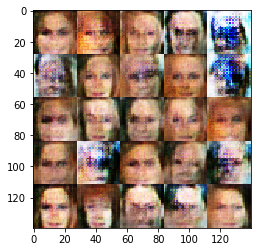

Epoch 1/1... Discriminator Loss: 1.350... Generator Loss: 0.839
Epoch 1/1... Discriminator Loss: 1.396... Generator Loss: 0.767
Epoch 1/1... Discriminator Loss: 1.381... Generator Loss: 0.814
Epoch 1/1... Discriminator Loss: 1.374... Generator Loss: 0.829
Epoch 1/1... Discriminator Loss: 1.380... Generator Loss: 0.760
Epoch 1/1... Discriminator Loss: 1.441... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.395... Generator Loss: 0.822
Epoch 1/1... Discriminator Loss: 1.427... Generator Loss: 0.793
Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.780
Epoch 1/1... Discriminator Loss: 1.475... Generator Loss: 0.670


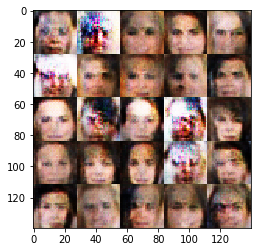

Epoch 1/1... Discriminator Loss: 1.428... Generator Loss: 0.766
Epoch 1/1... Discriminator Loss: 1.412... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.378... Generator Loss: 0.774
Epoch 1/1... Discriminator Loss: 1.371... Generator Loss: 0.792
Epoch 1/1... Discriminator Loss: 1.433... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.421... Generator Loss: 0.797
Epoch 1/1... Discriminator Loss: 1.411... Generator Loss: 0.803
Epoch 1/1... Discriminator Loss: 1.389... Generator Loss: 0.742
Epoch 1/1... Discriminator Loss: 1.646... Generator Loss: 0.884
Epoch 1/1... Discriminator Loss: 1.434... Generator Loss: 0.849


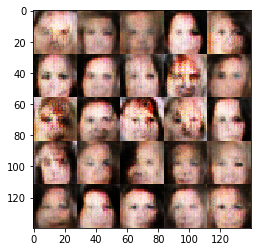

Epoch 1/1... Discriminator Loss: 1.359... Generator Loss: 0.758
Epoch 1/1... Discriminator Loss: 1.443... Generator Loss: 0.784
Epoch 1/1... Discriminator Loss: 1.373... Generator Loss: 0.925
Epoch 1/1... Discriminator Loss: 1.394... Generator Loss: 0.795
Epoch 1/1... Discriminator Loss: 1.413... Generator Loss: 0.756
Epoch 1/1... Discriminator Loss: 1.511... Generator Loss: 0.713
Epoch 1/1... Discriminator Loss: 1.405... Generator Loss: 0.890
Epoch 1/1... Discriminator Loss: 1.407... Generator Loss: 0.785
Epoch 1/1... Discriminator Loss: 1.375... Generator Loss: 0.807
Epoch 1/1... Discriminator Loss: 1.368... Generator Loss: 0.813


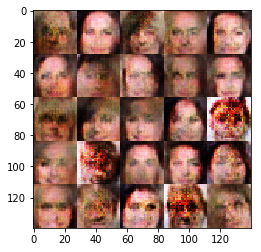

Epoch 1/1... Discriminator Loss: 1.398... Generator Loss: 0.851
Epoch 1/1... Discriminator Loss: 1.406... Generator Loss: 0.859
Epoch 1/1... Discriminator Loss: 1.354... Generator Loss: 0.838


In [17]:
batch_size = 32
z_dim = 100
learning_rate = 0.0004
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.